<a href="https://colab.research.google.com/github/Denysse-Sevilla/MAT-421/blob/main/Module_G_21_4_21_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework #8- Denysse Sevilla**

## Section 21.4: Simpson's Rule

**Simpson's Rule** approximates the area under two consecutive subintervals, $[x_{i-1},x_i]$ and $[x_i,x_{i+1}]$ by fitting a unique quadratic polynomial through the points and then integrating.

\
To approximate the integral over $(a,b)$, use the following formula:
$ ∫_a^b f(x)dx ≈ \frac{h}{3}[f(x_0) + 4f(x_1) + 2f(x_2) +...+ 4f(x_n-1) + f(x_n)]$,

where $n$ is the number of intervals and $h= \frac{b-a}{n}$ (width of each interval).

\
Note: To use this rule, you must have an even number of intervals

Ex: Use Simpson's Rule to approximate $∫_{π/2}^π cos(x) dx$ with 11 evenly spaced grid points over the whole interval. Compare this value to the exact value of -1.

In [ ]:
import numpy as np
a = (np.pi)/2
b = np.pi
m = 11 # grid points
h = (b - a) / (m-1)  # m-1 = number of intervals

x = np.linspace(a, b, m)
f = np.cos(x)

simp = (h/3) * (f[0] + 2*sum(f[:m-2:2]) \
+ 4*sum(f[1:m-1:2]) + f[m-1])

err_simp = -1 - simp

print(simp)
print(err_simp)

-1.0000033922209004
3.3922209004000337e-06


Notice that the error is very small!

## Section 21.5: Computing Integrals in Python

The $trapz$ function in Python takes an array of function values $f$ computed on a numerical grid $x$ as input arguments.

Ex: Use $trapz$ function to approximate $∫_{π/2}^π cos(x) dx$ with 11 evenly spaced grid points over the whole interval.

In [29]:
import numpy as np
from scipy.integrate import trapezoid

a = (np.pi)/2
b = np.pi
m = 11 # grid points
h = (b - a) / (m-1)  # m-1 = number of intervals

x = np.linspace(a, b, m)
f = np.cos(x)

trapz = trapezoid(f,x)

print(trapz)

-0.9979429863543571


The $cumtrapz$ function in Python allows you to calculate the approximated cumulative integral, or $F(X) = ∫_{x_0}^X f(x)dx$.

Note: $cumtrapz$ takes the same input arguments as $trapz$.

\
Ex: Use the $cumtrapz$ function to approximate the cumulative integral of $f(x)=cos(x)$ from $\frac{π}{2}$ to $π$ with a discretization step of 0.01. The exact solution of this integral is $F(x)=cos(x)$. Plot the results.


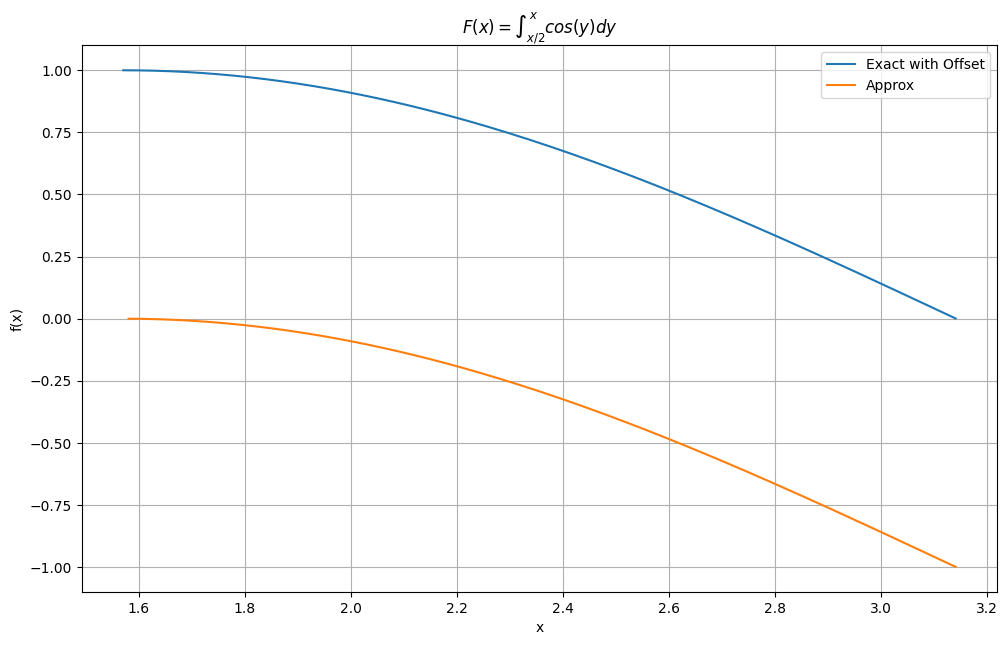

In [32]:
from scipy.integrate import cumulative_trapezoid
import matplotlib.pyplot as plt

x = np.arange(np.pi /2, np.pi, 0.01)
F_exact = np.sin(x)
F_approx = cumulative_trapezoid(np.cos(x), x)

plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x) = \int_{x/2}^{x} cos(y) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approx'])
plt.show()

Additionally, the $quad(f,a,b)$ function utilizes another numerical differentiation method to approximate integrals in Python.

\
Ex: Use the $integrate.quad$ function to compute $∫_{π/2}^{π}cos(x)dx$. Compare your answer with the correct answer of -1.

In [26]:
from scipy.integrate import quad

quad, est_err_quad = \
          quad(np.cos, np.pi / 2, np.pi)
print(quad)
err_quad = -1 - quad
print(est_err_quad, err_quad)

-0.9999999999999999
1.1102230246251564e-14 -1.1102230246251565e-16
